# Import Libraries

In [1]:
# data processing
import pandas as pd
import numpy as np

# graphing
import matplotlib.pyplot as plt
import plotly

# display settings
pd.set_option('display.max_columns', 60)

# Load Datasets
According to [the Dataset page on Kaggle](https://www.kaggle.com/jboysen/us-traffic-2015), the 2 provided datasets contain the following information:

1. `dottraffic2015.txt.gz`
- daily observation of traffic volume, divided into 24 hourly bins
- station_id, location information (geographical place), traffic flow direction, and type of road

2. `dottrafficstations_2015.txt.gz`
- deeper location and historical data on individual observation stations, cross-referenced by station_id

In [2]:
# load datasets
traffic_df = pd.read_csv('dot_traffic_2015.txt')
traffic_stations_df = pd.read_csv('dot_traffic_stations_2015.txt')

# EDA

In [3]:
traffic_df

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140386,2015-01-25,25,1,5,South,41,4R,Rural: Minor Arterial,0,1,3,NaN,024020,7,7,1,1,2,7,9,21,33,44,59,58,79,69,61,63,61,50,48,37,16,17,5,4,15
7140387,2015-10-08,8,5,7,West,53,1U,Urban: Principal Arterial - Interstate,2,10,3,NaN,P29AAA,12,12,5,18,48,191,377,533,454,389,401,497,511,621,697,871,986,970,534,347,209,141,80,57,15
7140388,2015-05-25,25,2,3,East,15,1U,Urban: Principal Arterial - Interstate,5,5,3,NaN,001162,81,46,86,199,388,564,586,518,539,649,704,735,679,719,670,609,621,560,485,340,307,272,152,110,15
7140389,2015-10-07,7,4,3,East,48,1U,Urban: Principal Arterial - Interstate,0,10,3,NaN,000165,664,458,485,557,1367,4556,7352,6882,6782,6185,5397,5539,5712,5880,5999,7059,6286,4962,6293,4786,3295,2764,2148,1175,15


In [4]:
# see all columns of traffic_df
# check for missing data and dtypes
traffic_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   date                                       7140391 non-null  object 
 1   day_of_data                                7140391 non-null  int64  
 2   day_of_week                                7140391 non-null  int64  
 3   direction_of_travel                        7140391 non-null  int64  
 4   direction_of_travel_name                   7140391 non-null  object 
 5   fips_state_code                            7140391 non-null  int64  
 6   functional_classification                  7140391 non-null  object 
 7   functional_classification_name             7140391 non-null  object 
 8   lane_of_travel                             7140391 non-null  int64  
 9   month_of_data                              7140391 non-null  int64  

Only `restrictions` has missing values (in fact, the entire column does not contain a single value at all). The other 37 columns are fully filled.

In [5]:
traffic_stations_df

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

In [6]:
traffic_stations_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

In [30]:
# get a list of all traffic volume from 0000HRS to 2400HRS
traffic_vol_list = ['traffic_volume_counted_after_0000_to_0100',
                    'traffic_volume_counted_after_0100_to_0200',
                    'traffic_volume_counted_after_0200_to_0300',
                    'traffic_volume_counted_after_0300_to_0400',
                    'traffic_volume_counted_after_0400_to_0500',
                    'traffic_volume_counted_after_0500_to_0600',
                    'traffic_volume_counted_after_0600_to_0700',
                    'traffic_volume_counted_after_0700_to_0800',
                    'traffic_volume_counted_after_0800_to_0900',
                    'traffic_volume_counted_after_0900_to_1000',
                    'traffic_volume_counted_after_1000_to_1100',
                    'traffic_volume_counted_after_1100_to_1200',
                    'traffic_volume_counted_after_1200_to_1300',
                    'traffic_volume_counted_after_1300_to_1400',
                    'traffic_volume_counted_after_1400_to_1500',
                    'traffic_volume_counted_after_1500_to_1600',
                    'traffic_volume_counted_after_1600_to_1700',
                    'traffic_volume_counted_after_1700_to_1800',
                    'traffic_volume_counted_after_1800_to_1900',
                    'traffic_volume_counted_after_1900_to_2000',
                    'traffic_volume_counted_after_2000_to_2100',
                    'traffic_volume_counted_after_2100_to_2200',
                    'traffic_volume_counted_after_2200_to_2300',
                    'traffic_volume_counted_after_2300_to_2400']

## Monthly Traffic

In [53]:
month_df = traffic_df.groupby('month_of_data')[traffic_vol_list].sum()
month_df

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
month_of_data,,,,,,,,,,,,,,,,,,,,,,,,
1,61011904,43174878,36514537,37818175,60980679,128640317,232371227,320761817,317122722,301265142,312040982,335813103,358434278,369338938,395005703,427973615,446992899,435108238,349743661,262129739,210352454,181690512,144652453,109044456
2,55918929,38587706,33196894,35076256,58164251,124380830,225414421,310791307,305569454,290587100,297388285,316236939,336556280,345294758,369844385,400634204,419044917,408756320,333256549,253320034,203215643,175197031,138448308,102994352
3,64820321,44768204,38137598,41003205,68525884,143514001,255148741,348734866,343822243,326775194,334657923,355388515,374556417,383271450,407445686,440186007,459465719,447892644,361761251,279086887,224229548,184911851,140650425,97983868
4,69530001,47729117,40689094,43635075,74063889,156559089,280882559,382503412,373909211,355725717,364358394,384943067,404312588,412889935,438377243,473019731,492293136,480991425,390776552,305365314,249722140,205513554,155239397,107656112
5,76653803,52921949,43489543,44806243,73923292,154597974,275926253,371819255,369600775,362944979,377750748,401275322,420761313,430371575,453042605,481348956,494710716,481553060,398215839,316965536,263982834,221363724,169696154,118538220
6,69009550,46188482,37877936,39844342,67259599,144085144,255725934,338608857,336763337,327174509,339272323,358897090,375848012,381343646,399234694,424744702,442334615,434134187,354025510,278722590,230941820,195895143,150926936,105483330
7,78007022,52413644,43165231,45485055,76936518,156285474,268775609,353376447,356821546,354639138,372221918,395639538,413061930,419615428,436801399,459527277,474860464,465337402,385211015,306341537,255906073,218386461,172498294,122385255
8,73136010,49349745,40881555,42578278,71395859,146383006,253616378,341407956,341914153,338301026,356030462,378026075,394736968,400912398,419332950,444007879,459953928,449721769,371435594,294243305,244609797,202888863,155848273,109893733
9,66874172,45523618,38801333,42207288,72512768,153374127,269829220,362397179,353613300,339603370,349180349,370115771,387344576,394392154,418346680,448136529,464658133,453815138,372433370,293155353,237077295,192560257,146277912,102845240


In [54]:
# sum up all 24-hour interval traffic volume
month_df['Total']= month_df.sum(axis=1)

# convert index into column for plotting
month_df.reset_index(level=0, inplace=True)

No handles with labels found to put in legend.


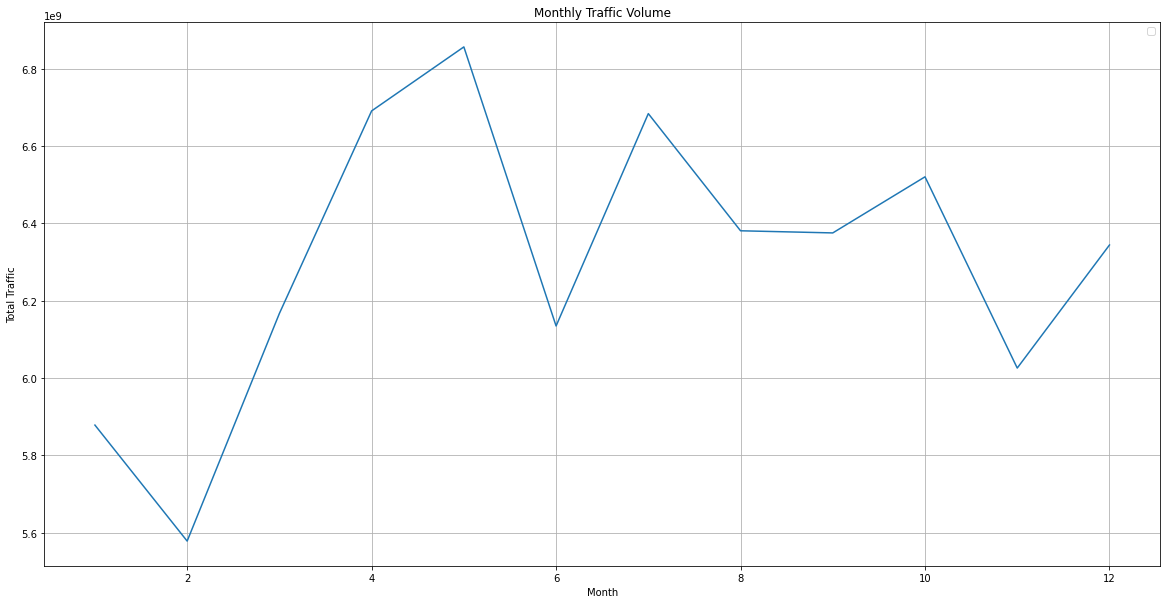

In [12]:
# plot monthly
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()

plt.title("Monthly Traffic Volume")
plt.xlabel("Month")
plt.ylabel("Total Traffic")

plt.plot(month_df['month_of_data'],month_df['Total'])
plt.legend()
plt.grid()

From the monthly graph for the year of 2015, it can be shown that the month with the largest traffic volume is May. There is a large increase in traffic from February to May.

## Weekly Traffic

In [15]:
week_df = traffic_df.groupby('day_of_week')[traffic_vol_list].sum()
week_df

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,
1,153964514,104875219,80406553,62665177,64185943,93773635,147689326,210696903,302891346,425912166,536996967,602261910,662558331,674087558,672006524,667704720,656639068,619827717,551570975,466962574,385447953,303392069,225878287,153433733
2,94438970,63638011,54508709,67307402,133377483,296450257,526839598,698768727,649488876,580012388,576423904,603273519,629225475,640245124,691022014,759933096,805631367,792207909,604244893,442785584,348810061,283600404,210290041,146669572
3,93517704,64663882,57575966,70645051,137023856,309243346,556457923,737959633,679937735,595876725,572838601,592561921,619820950,635795730,692660174,772676425,827406796,818110853,632227505,465208607,370054163,305693988,226156426,157019491
4,98191794,67988059,60230886,72518236,137913180,310541738,558018012,741036584,685821960,604606613,583949676,611878035,637932694,656483898,712281967,787526105,838807378,827131914,648948884,481688195,392969021,322915013,238415158,165429649
5,106811928,75075648,65879029,76220792,139023472,306981761,548574290,729421439,680421044,611519605,602770700,634113352,664390735,682110324,737974762,809942594,854192812,840156290,671305416,514017190,418753663,350247165,264482775,185262215
6,114366927,79712786,68971702,77169384,134001602,286575788,514708668,697711737,662872307,617923192,636023926,682288485,720442219,745933175,798126668,857206162,882507123,857634251,721729145,569951234,461295938,401168057,328052899,239166048
7,156910116,106320660,85299764,74453661,91222063,148731841,242572379,349965519,462125638,563264031,640336901,689335544,707844928,703047301,701217078,698276058,683211374,647019909,577966305,482316096,412009969,371280351,316418722,237074417


In [16]:
# sum up all 24-hour interval traffic volume
week_df['Total']= week_df.sum(axis=1)

# convert index into column for plotting
week_df.reset_index(level=0, inplace=True)

No handles with labels found to put in legend.


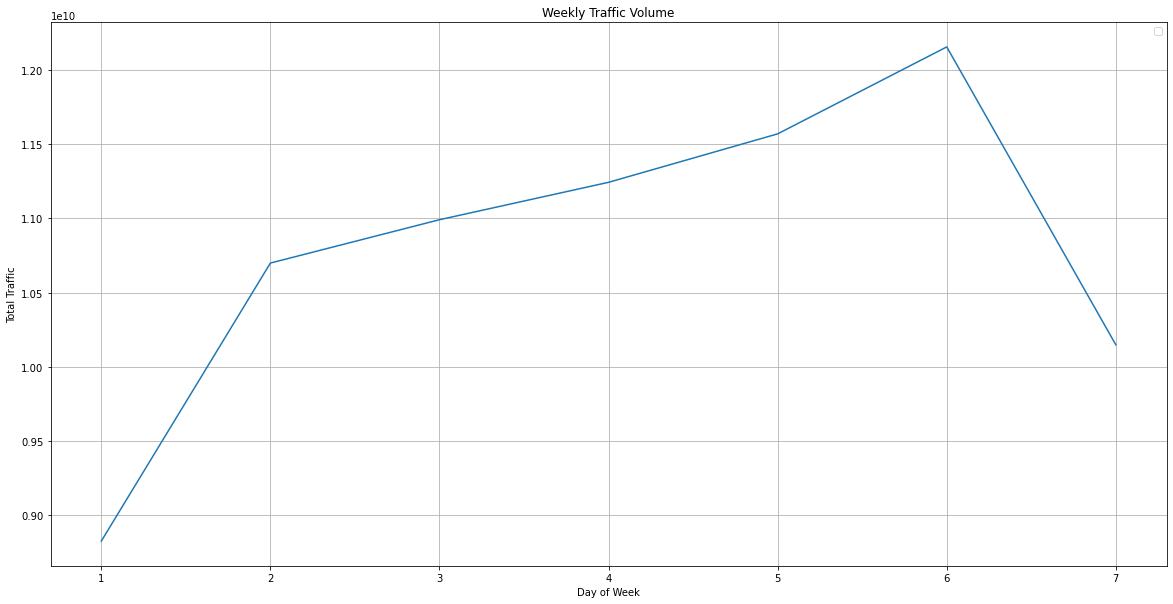

In [18]:
# plot weekly
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()

plt.title("Weekly Traffic Volume")
plt.xlabel("Day of Week")
plt.ylabel("Total Traffic")

plt.plot(week_df['day_of_week'],week_df['Total'])
plt.legend()
plt.grid()

From the graph above, the day with the largest traffic volume is Saturday. Traffic volume tend to increase from Monday to Saturday. Volume decreases the most on Sunday, but at a higher volume than Monday.

## Direction of Travel

In [20]:
travel_dir_df = traffic_df.groupby('direction_of_travel_name')[traffic_vol_list].sum()
travel_dir_df

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
direction_of_travel_name,,,,,,,,,,,,,,,,,,,,,,,,
East,162092788,110108206,92186738,98186249,170446884,352793025,610524775,814371293,805366875,776484350,802341867,856213998,904345406,924660924,981066896,1051337391,1088949104,1061408763,869091517,674726219,552393616,466334303,363095876,258511834
East-West or Southeast-Northwest combined (ATR stations only),7548262,5090645,4221436,4375482,6664606,13976808,30262261,46014341,45872052,44087800,46567740,49858795,52465680,53710457,55974873,59409954,62025736,60876881,48219238,35909230,27891175,22229719,16686459,11633153
North,239012542,164952302,137884423,144714156,236820038,493808855,880222774,1190970896,1181277983,1146410657,1192253740,1269279427,1332023870,1358281722,1433971311,1533629256,1590142753,1547861021,1264759001,986781628,804828772,673151574,521217179,369825771
North-South or Northeast-Southwest combined (ATR stations only),12158872,8427905,7065165,7407687,11731574,25568448,51297062,80624789,80074520,76666652,82771745,89435809,93270755,94132116,99465547,106964132,111756114,109327022,83093158,61795861,48078071,37619148,27425500,19027430
Northeast,1376123,829865,654412,664305,1286456,3036342,6085325,8978459,8752774,8728298,9212147,9786976,10251448,10496171,11195138,12495448,13181535,12670914,9500086,7016434,5641371,4643421,3409093,2247905
Northwest,1637996,1044129,866424,984668,1810084,4126355,8822376,13353863,12603563,12604431,13445109,14223812,14732931,15150409,15974508,17249976,17803039,16442442,12840957,9542372,7747352,6528977,4593383,2817150
South,232974734,161603287,136420015,143610606,233855644,494851947,872411903,1171841297,1162273044,1131627184,1173796233,1245688641,1307503426,1333116658,1405832983,1502094082,1555757878,1512388716,1237314042,963837509,785641675,658562887,509354554,361519826
Southeast,1635563,1052683,893855,1173583,2118563,5067815,10077062,14044998,13183103,13206531,14093306,14892608,15432352,15657596,16281802,17474240,18591263,17789192,13683354,9897332,7796452,6424140,4614926,2865497
Southwest,1223324,775298,665918,754406,1505452,4091807,7652190,10246783,9379425,8804878,9360132,9995291,10499780,10777153,11324102,12192576,12334277,11666469,9125640,6752683,5599112,4784434,3506082,2205387


In [21]:
# sum up all 24-hour interval traffic volume
travel_dir_df['Total']= travel_dir_df.sum(axis=1)

# convert index into column for plotting
travel_dir_df.reset_index(level=0, inplace=True)

No handles with labels found to put in legend.


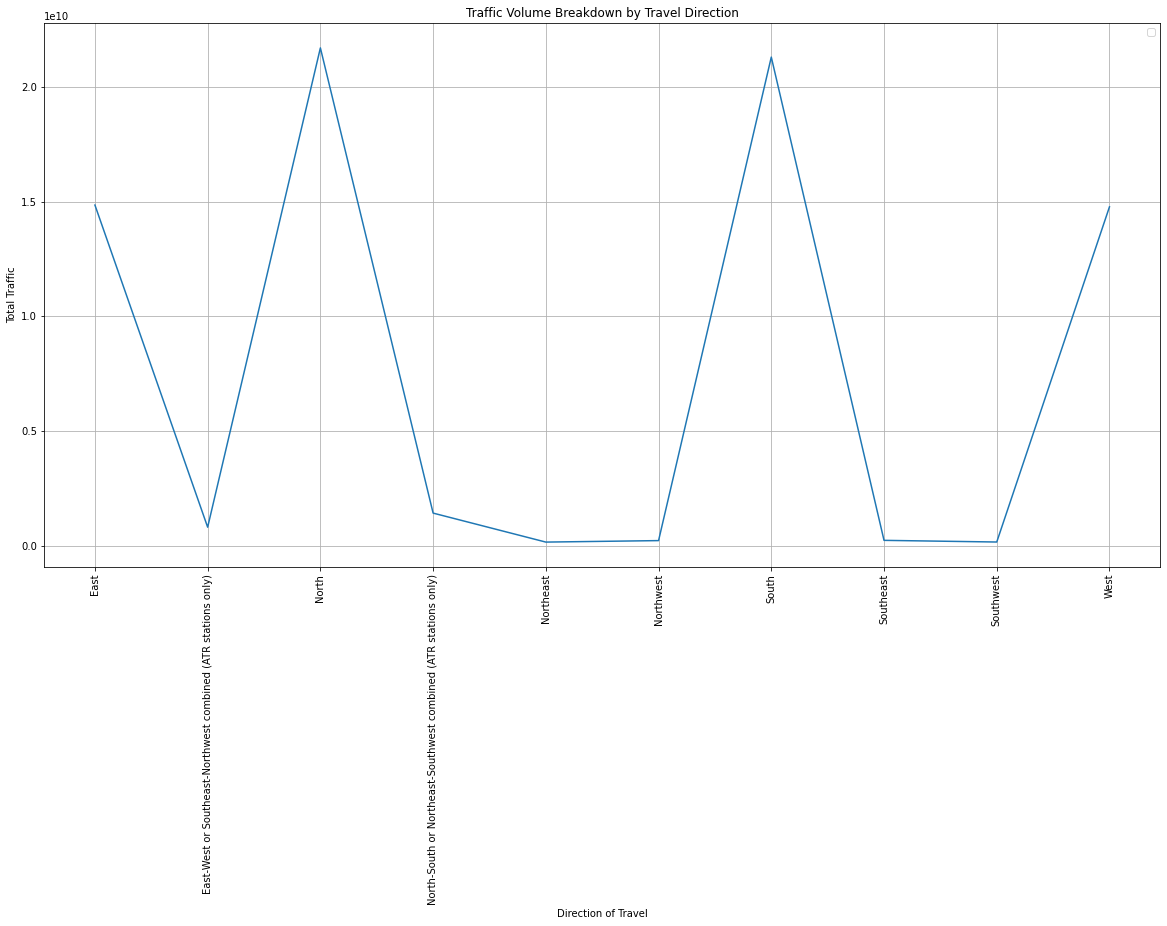

In [24]:
# plot direction of travel
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()
plt.xticks(rotation=90)

plt.title("Traffic Volume Breakdown by Travel Direction")
plt.xlabel("Direction of Travel")
plt.ylabel("Total Traffic")

plt.plot(travel_dir_df['direction_of_travel_name'],travel_dir_df['Total'])
plt.legend()
plt.grid()

Looking at the direction of travel breakdown, the traffic flow direction that is the heaviest is the North/South direction, followed by the East/West direction.

Furthermore, traffic flow in opposite directions tend to have the same volume (e.g. North and South have about the same direction, likewise for Northeast and Southwest).

## Lane of Travel

In [25]:
lane_df = traffic_df.groupby('lane_of_travel')[traffic_vol_list].sum()
lane_df

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
lane_of_travel,,,,,,,,,,,,,,,,,,,,,,,,
0,409241065,283237751,242848563,258293211,446141765,924475389,1555707525,2051221048,2054480518,1984637406,2036489708,2159143105,2265963351,2314152006,2447522244,2591259471,2664592828,2606710854,2155178790,1679429144,1369726313,1152389915,891592168,622107095
1,181021995,128836205,109333386,116209748,178921731,350067788,620011920,863507478,865070868,865018865,914129559,976386932,1026620451,1037978203,1081766728,1156556979,1201250945,1164349052,944592208,739468658,608607048,506586191,392150118,287087011
2,136694945,92755784,75823831,78665422,125907517,269362776,508629951,704817880,683767881,668925275,709701223,762593322,804294775,821362204,867511676,938562396,982244618,949503317,756730810,584623635,475508334,396229136,305705863,221199766
3,59828251,37903578,29551416,30898855,54240830,128593394,257894656,350655262,335156489,310579194,318988338,339287393,357778820,368189119,395308174,432928365,455479210,443159869,355834040,271029874,218019530,183412771,142398334,100324864
4,21239867,13290552,10452898,11505163,21353080,52767275,103399674,134479611,126927082,115865731,116096183,122190005,128695282,133981954,145695605,160395612,168334528,163341823,132431761,99990283,79360545,67586447,52481618,36303902
5,7471537,4666455,3661219,4158483,7847325,18837595,32824129,41730004,40552961,37836246,37796116,39270265,41029172,42973998,46409830,50281330,52779941,51422793,43021563,33410612,26665498,22568887,17976427,12271683
6,2139412,1233533,915222,967508,1826695,6334340,12844010,14940540,13848005,12971365,12877108,13440618,14191778,15089860,16592646,18390090,18633161,18566366,16108877,11995238,9086513,7534907,5847949,3775304
7,426546,262586,210716,205924,371534,1561284,3043298,3578059,3194005,2690620,2585333,2624418,2760725,2977176,3308745,3668706,3885582,3893052,3138430,2243524,1763733,1480691,1170194,749030
8,136722,86932,74692,74787,136080,295840,499993,625905,556237,584518,670574,769256,872605,989082,1161017,1199023,1163733,1113059,944292,730893,597334,502877,367844,233845


In [26]:
# sum up all 24-hour interval traffic volume
lane_df['Total']= lane_df.sum(axis=1)

# convert index into column for plotting
lane_df.reset_index(level=0, inplace=True)

No handles with labels found to put in legend.


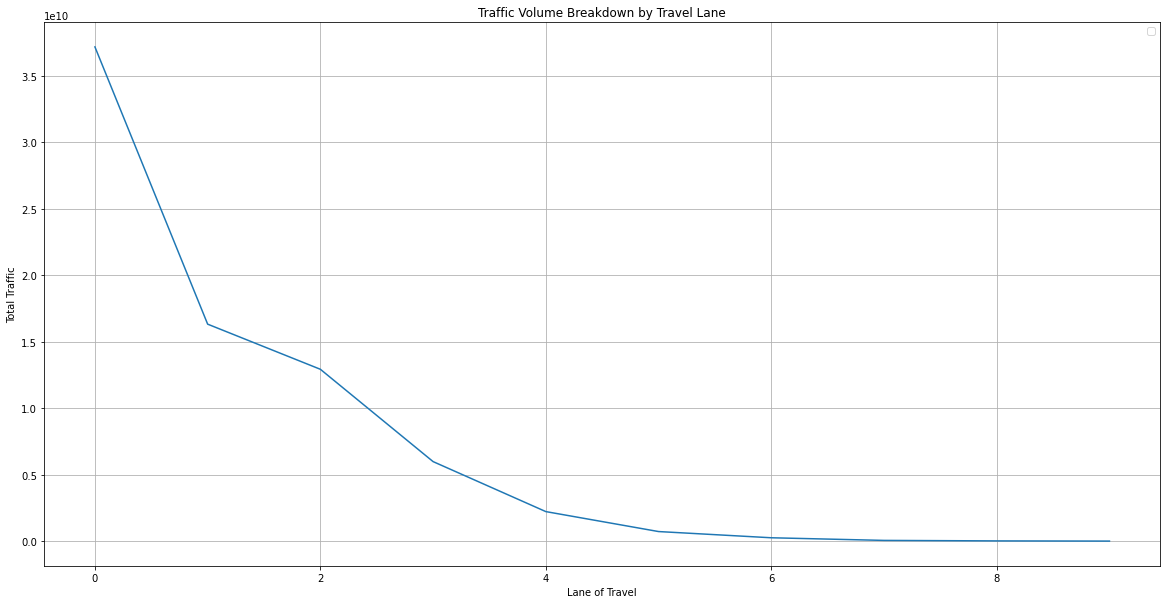

In [35]:
# plot lane of travel
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()

plt.title("Traffic Volume Breakdown by Travel Lane")
plt.xlabel("Lane of Travel")
plt.ylabel("Total Traffic")

plt.plot(lane_df['lane_of_travel'], lane_df['Total'])
plt.legend()
plt.grid()

Traffic flow follows a clearly exponential decrease from Lane 0 (most volume) to Lane 9 (least volume).

The `traffic_stations_df` has a significant number of missing values, hence I will drop all rows that contain any missing values. This is to help reduce the size of the dataframe, which allows the merging of the two datasets within the RAM limit.

In [31]:
traffic_stations_df.dropna(inplace=True)

In [32]:
# check
traffic_stations_df

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
74,F,Axle spacing with Scheme F,U,Uncalibrated,13,0,00000000,1,North,31,17,3U,Urban: Principal Arterial - Other,000000000000,N,0,Data with lanes combined,41.711970,87.740640,000000000000,0.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),1,Portable static scale,3,Permanent vehicle classification device,Y,3,6,0,0,3,00000050,000000,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,N,0000,001200,IL 50 (Cicero Ave.) South of 9,L,Inductance loop,15,0,0
250,F,Axle spacing with Scheme F,U,Uncalibrated,13,0,00000000,7,West,77,17,3U,Urban: Principal Arterial - Other,000000000000,N,0,Data with lanes combined,37.749000,89.262160,000000000000,0.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),1,Portable static scale,3,Permanent vehicle classification device,Y,2,4,0,4,3,00000013,000000,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,P,0000,009100,IL 13 2.7 miles east of IL 13,L,Inductance loop,15,0,88
264,F,Axle spacing with Scheme F,U,Uncalibrated,13,0,00000000,3,East,31,17,5U,Urban: Collector,000000000000,N,0,Data with lanes combined,41.812140,87.883240,000000000000,0.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),1,Portable static scale,3,Permanent vehicle classification device,N,1,2,0,0,0,00000000,000000,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,N,0000,001210,West Cossitt Ave. East of Suns,L,Inductance loop,15,0,0
266,K,Axle spacing and weight algorithm,T,Test trucks only,13,0,00000000,5,South,37,26,2U,Urban: Principal Arterial - Other Freeways or ...,000000000000,N,0,Data with lanes combined,0.000000,0.000000,000003190000,8620.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),5,Permanent weigh-in-motion system,3,Permanent vehicle classification device,Y,2,2,2,2,2,00000127,038WIM,P,Planning or traffic statistics purposes,S,N,Station not used for Traffic Volume Trends,T,Station used for TMG sample (but not SHRP/LTPP...,H,Station used for Heavy Vehicle Travel Informat...,L,0000,195029,US-127 ST. JOHNS S. BD.,L,Inductance loop,15,5,57
288,K,Axle spacing and weight algorithm,M,Moving average of the steering axle of 3S2s,13,0,00

In [33]:
# combine both datasets
final_df = pd.merge(traffic_df, traffic_stations_df, how="inner", on="station_id")
final_df

,date,day_of_data,day_of_week,direction_of_travel_x,direction_of_travel_name_x,fips_state_code_x,functional_classification_x,functional_classification_name_x,lane_of_travel_x,month_of_data,record_type_x,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,...,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type_y,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_location,type_of_sensor,type_of_sensor_name,year_of_data_y,year_station_discontinued,year_station_established
0,2015-04-21,21,3,1,North,26,1R,Rural: Principal Arterial - Interstate,1,4,3,NaN,127269,125,83,109,103,140,201,283,331,337,411,391,397,394,384,402,440,415,...,Permanent automatic traffic recorder (ATR),5,Permanent weigh-in-motion system,3,Permanent vehicle classification device,Y,2,2,2,2,1,00000069,044WIM,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,T,Station used for TMG sample (but not SHRP/LTPP...,H,Station used for Heavy Vehicle Travel Informat...,L,0000,I-69 COLDWATER SOUTH BD. LANE-,Q,Quartz piezoelectric - NEW,15,0,85
1,2015-04-21,21,3,1,North,26,1R,Rural: Principal Arterial - Interstate,1,4,3,NaN,127269,125,83,109,103,140,201,283,331,337,411,391,397,394,384,402,440,415,...,Permanent automatic traffic recorder (ATR),5,Permanent weigh-in-motion system,3,Permanent vehicle classification device,Y,2,2,2,2,1,00000069,044WIM,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,T,Station used for TMG sample (but not SHRP/LTPP...,H,Station used for Heavy Vehicle Travel Informat...,L,0000,I-69 COLDWATER NORTH BOUND TOT,Q,Quartz piezoelectric - NEW,15,0,85
2,2015-04-21,21,3,1,North,26,1R,Rural: Principal Arterial - Interstate,1,4,3,NaN,127269,125,83,109,103,140,201,283,331,337,411,391,397,394,384,402,440,415,...,Permanent automatic traffic recorder (ATR),5,Permanent weigh-in-motion system,3,Permanent vehicle classification device,Y,2,2,2,2,1,00000069,044WIM,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,T,Station used for TMG sample (but not SHRP/LTPP...,H,Station used for Heavy Vehicle Travel Informat...,L,0000,I-69 COLDWATER SOUTH BD. LANE-,Q,Quartz piezoelectric - NEW,15,0,85
3,2015-04-21,21,3,1,North,26,1R,Rural: Principal Arterial - Interstate,1,4,3,NaN,127269,125,83,109,103,140,201,283,331,337,411,391,397,394,384,402,440,415,...,Permanent automatic traffic recorder (ATR),5,Permanent weigh-in-motion system,3,Permanent vehicle classification device,Y,2,2,2,2,1,00000069,044WIM,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,T,Station used for TMG sample (but not SHRP/LTPP...,H,Station used for Heavy Vehicle Travel I

## Station Locations

In [34]:
final_df = final_df.groupby('station_location')[traffic_vol_list].sum()
final_df

,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400
station_location,,,,,,,,,,,,,,,,,,,,,,,,
163rd Street West of S. Pepper,3398,2472,1294,1560,1750,5162,13164,25990,27712,24200,24952,28856,30942,29260,31632,42988,43150,45572,39524,28062,20632,14524,10330,6454
Arsenal Manhattan Rd. West of,6144,4946,7046,6218,19372,53506,59056,49518,43398,45478,45114,46536,52362,56394,62376,78380,91124,75726,47866,30856,23814,23868,18644,11270
Bruce - Finley Rd. 2.5 miles w,6034,3716,2966,3476,8646,31266,53686,74886,63448,67506,73594,76850,78032,80068,87734,100352,108188,102724,72144,54572,43818,30730,20294,12074
Campton Hills Dr. West of Peck,9986,5328,3588,2676,8804,43312,71244,117332,128180,123250,131332,154082,157322,152126,170318,170972,206662,205618,162152,129842,76776,58142,41678,17860
Devon Ave. West of Ridge Ave.,146208,96156,74834,83806,159526,435186,833054,1196912,1133024,808638,737998,914394,1124312,1043950,1047732,1170284,1409506,1367724,891472,567886,432028,365228,312638,205654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Cossitt Ave. East of Suns,1008,518,240,200,270,1036,2884,10346,6890,7204,7730,9898,9492,9250,9174,12696,10554,11130,9518,6968,4948,4330,2776,1628
West Glenn Ave. 0.5 mile east,43272,21112,24948,31244,80726,211862,478654,572578,541210,643638,755730,833246,802746,788014,858490,874740,855782,625076,481944,370014,254844,156930,93144,57718
West_of_Stillwater_MN,1358108,824632,681660,783704,1421728,3415568,6100792,8929612,8991848,9393084,10341584,11409012,12246084,12336244,12976364,13580052,13742844,12857052,9691892,7290944,5876600,4533200,3115556,2052820


In [36]:
# sum up all 24-hour interval traffic volume
final_df['Total']= final_df.sum(axis=1)

# convert index into column for plotting
final_df.reset_index(level=0, inplace=True)

No handles with labels found to put in legend.


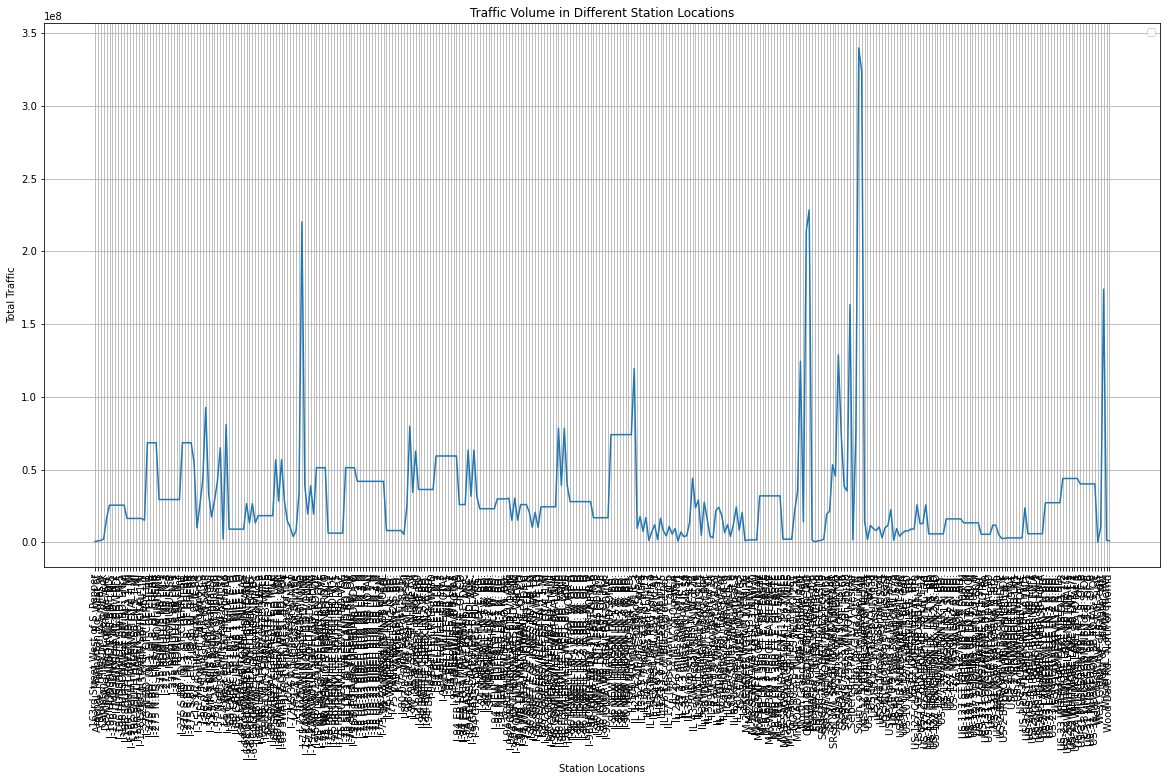

In [43]:
# plot station locations
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()
plt.xticks(rotation=90)

plt.title("Traffic Volume in Different Station Locations")
plt.xlabel("Station Locations")
plt.ylabel("Total Traffic")

plt.plot(final_df['station_location'], final_df['Total'])
plt.legend()
plt.grid()

There are too many station locations such that the plot becomes too clustered. I will filter the data down to the 10 stations with the highest traffic flow.

In [41]:
# get the 10 locations with the highest Total
top_10 = final_df.sort_values(by='Total', ascending=False).head(10)
top_10

,station_location,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,Total
262,South_of_Lafayette_Bridge_in_S,3144760,2087868,1738536,1701356,2708488,6387872,14013092,21362084,18996060,17134760,18001248,19812820,21104572,21229292,22453588,25276188,27438376,26427628,20018196,14974500,12039956,9704664,7161072,4836868,339753844
263,South_of_Owatonna_MN,3557932,2589416,2180700,2341216,3618212,7257532,12952656,16781116,15926844,16309700,17666028,19429704,20388508,20562132,21428800,23234616,24479284,23720060,19398724,15157584,12203860,9890408,7489096,5299808,323863936
245,ON I-4169' E OF ENTERPRISE RD,2613976,1786176,1452688,1517724,2154496,4805916,9974616,12891068,12437076,12116316,12828292,13452964,13613872,13732652,14306040,15308456,16378880,16691868,14191028,10857948,8675676,7231224,5514612,3948448,228482012
71,I-75 1.25 MI N OF CR-846/IMMO,1790220,1101176,873492,843056,1683752,3605388,9384476,13934680,14050856,12796364,13314660,13782792,13947396,13789948,14435664,15940688,16967892,16957564,12591640,8674552,6849888,5782148,4242632,2794308,220135232
244,North_of_Blatnik_Bridge_in_Dul,2270504,1710068,1548208,1777792,2524264,4365364,7297492,10269320,11155400,11839828,12594184,13664760,14425204,14605580,15018308,15623904,16010628,14585048,11702864,9286404,7579192,6156984,4701132,3365492,214077924
346,West_of_Stillwater_MN,1358108,824632,681660,783704,1421728,3415568,6100792,8929612,8991848,9393084,10341584,11409012,12246084,12336244,12976364,13580052,13742844,12857052,9691892,7290944,5876600,4533200,3115556,2052820,173950984
259,SR-9A/I-2953 MI N OF I-10JAC,2040668,1456068,1302556,1606884,2183340,4188416,7549360,9484704,9180284,8814476,8837684,8956124,9312352,9429344,10216856,11433932,11811096,11461560,9163180,7156332,5757164,4744180,4098940,3115116,163300616
255,SR-93/I-753 MI N OF MARION CO,1937100,1491088,1259272,1197816,1410172,2004584,3356940,5012696,6075532,6986464,8138964,8792132,8932292,8993652,9161680,9196320,8953220,8389564,7062028,5784544,4865152,4047512,3220316,2539016,128808056
242,Near_Cotton_MN,1286132,865496,689808,761144,1304764,2728672,4133940,5796900,5844212,6360944,7092752,8039064,8622852,8646660,9026256,9439864,9648840,9165228,7107016,5484692,4351972,3680360,2537200,1762012,124376780
185,IL 100 4.0 miles east of IL 3,1637784,1119592,835644,747156,1144236,2651690,5306622,6760188,6776930,6515390,6561304,6895366,7269958,7318362,7684414,7800698,7658244,7448170,6871914,5638738,4714548,4083934,3391796,2576310,119408988


No handles with labels found to put in legend.


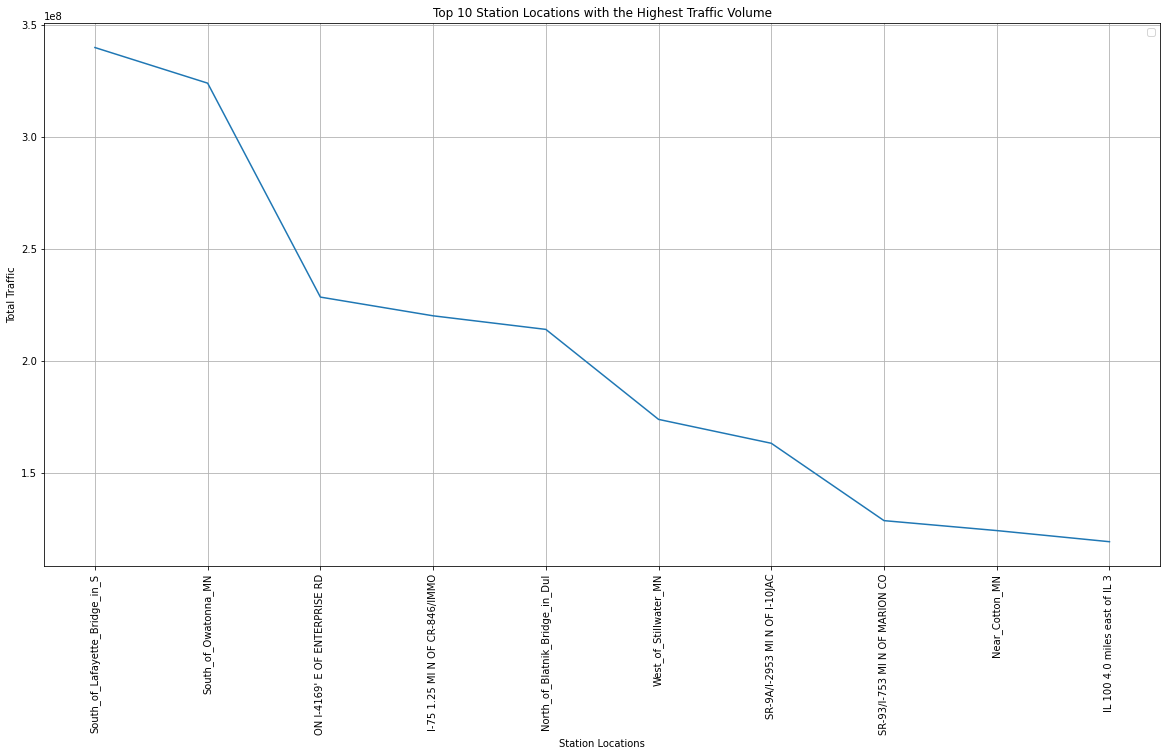

In [42]:
# plot station locations
fig = plt.figure(1,figsize=(20, 10))
ax = fig.gca()
plt.xticks(rotation=90)

plt.title("Top 10 Station Locations with the Highest Traffic Volume")
plt.xlabel("Station Locations")
plt.ylabel("Total Traffic")

plt.plot(top_10['station_location'], top_10['Total'])
plt.legend()
plt.grid()

The station with the highest traffic flow is `South_of_Lafayette_Bridge`, which is followed closely by `South_of_Owatonna`.